# Retail Supply Chain Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

importing essential libraries
1) Pandas - data manipulation
2) Numpy - numeric/ array computation
3) Matplot & seaborn - for data visualization
4) %matplotlib inline - for display visuals without plt.show

In [2]:
#Import data
df=pd.read_excel('F:/Project/Retail_Supply_Chain.xlsx')
df

,Row_id,Order_id,Order_date,Ship_date,Ship_mode,Customer_id,Customer_name,Segment,Country,City,...,Retail_sales_people,Product_id,Category,Sub_category,Product_name,Returned,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Cassandra Brandow,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,Not,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Cassandra Brandow,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Not,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Anna Andreadi,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,Not,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Cassandra Brandow,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,Not,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Cassandra Brandow,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,Not,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Cassandra Brandow,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,Not,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Anna Andreadi,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,Yes,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Anna Andreadi,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,Yes,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Anna Andreadi,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",Yes,29.6000,4,0.00,13.3200


Read excel file and see few rows of data

In [3]:
df.columns

Index(['Row_id', 'Order_id', 'Order_date', 'Ship_date', 'Ship_mode',
       'Customer_id', 'Customer_name', 'Segment', 'Country', 'City', 'State',
       'Postal_code', 'Region', 'Retail_sales_people', 'Product_id',
       'Category', 'Sub_category', 'Product_name', 'Returned', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

by **df.columns** we can see what are the columns are there in dataset

In [4]:
# Check no of rows and columns
df.shape

(9994, 23)

by **df.shape** we get to know the how many no of rows and columns present in the dataset

In [5]:
# Top 5 rows
df.head(5)

,Row_id,Order_id,Order_date,Ship_date,Ship_mode,Customer_id,Customer_name,Segment,Country,City,...,Retail_sales_people,Product_id,Category,Sub_category,Product_name,Returned,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Cassandra Brandow,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,Not,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Cassandra Brandow,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Not,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Anna Andreadi,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,Not,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Cassandra Brandow,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,Not,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Cassandra Brandow,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,Not,22.3680,2,0.20,2.5164


by **head()** function we can see top rows in the dataset

In [6]:
# bottom 5 rows
df.tail(5)

,Row_id,Order_id,Order_date,Ship_date,Ship_mode,Customer_id,Customer_name,Segment,Country,City,...,Retail_sales_people,Product_id,Category,Sub_category,Product_name,Returned,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Cassandra Brandow,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,Not,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Anna Andreadi,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,Yes,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Anna Andreadi,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,Yes,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Anna Andreadi,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",Yes,29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-04-05,2017-09-05,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,Anna Andreadi,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",Not,243.160,2,0.0,72.9480


by **tail()** function we can see the bottom rows of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Row_id               9994 non-null   int64         
 1   Order_id             9994 non-null   object        
 2   Order_date           9994 non-null   datetime64[ns]
 3   Ship_date            9994 non-null   datetime64[ns]
 4   Ship_mode            9986 non-null   object        
 5   Customer_id          9994 non-null   object        
 6   Customer_name        9994 non-null   object        
 7   Segment              9994 non-null   object        
 8   Country              9994 non-null   object        
 9   City                 9994 non-null   object        
 10  State                9994 non-null   object        
 11  Postal_code          9994 non-null   int64         
 12  Region               9994 non-null   object        
 13  Retail_sales_people  9994 non-nul

by te **info()** function we can summarize the data like we can see all the column names 
along with there rows count and there datatype.

In [8]:
# Check null values
df.isnull().sum()

Row_id                 0
Order_id               0
Order_date             0
Ship_date              0
Ship_mode              8
Customer_id            0
Customer_name          0
Segment                0
Country                0
City                   0
State                  0
Postal_code            0
Region                 0
Retail_sales_people    0
Product_id             0
Category               6
Sub_category           0
Product_name           0
Returned               0
Sales                  0
Quantity               0
Discount               0
Profit                 0
dtype: int64

by **isnull().sum()** we check whether dataset contains any null values.here ship_mode and category columns has some null values

In [9]:
# Null value treatment
df["Ship_mode"].fillna(df["Ship_mode"].mode()[0], inplace=True)
df["Category"].fillna(df["Category"].mode()[0], inplace=True)

as both are categorical columns so i fill it using mode

In [10]:
df.isnull().sum()

Row_id                 0
Order_id               0
Order_date             0
Ship_date              0
Ship_mode              0
Customer_id            0
Customer_name          0
Segment                0
Country                0
City                   0
State                  0
Postal_code            0
Region                 0
Retail_sales_people    0
Product_id             0
Category               0
Sub_category           0
Product_name           0
Returned               0
Sales                  0
Quantity               0
Discount               0
Profit                 0
dtype: int64

In [11]:
# Check for duplicates
df.duplicated().sum()

0

duplicated() method is used to Check for is any duplicate records are present in data

In [12]:
# Check datatype
df.dtypes

Row_id                          int64
Order_id                       object
Order_date             datetime64[ns]
Ship_date              datetime64[ns]
Ship_mode                      object
Customer_id                    object
Customer_name                  object
Segment                        object
Country                        object
City                           object
State                          object
Postal_code                     int64
Region                         object
Retail_sales_people            object
Product_id                     object
Category                       object
Sub_category                   object
Product_name                   object
Returned                       object
Sales                         float64
Quantity                        int64
Discount                      float64
Profit                        float64
dtype: object

by dtypes we can see all the datatypes of the column 

# Feature Engineering

In [13]:
# Delivery time
df['Delivery_time']= (df['Ship_date'] - df['Order_date']).dt.days

In [14]:
# Shipping delay
df['Shipping_status'] = df['Delivery_time'].apply(lambda x: 'Delayed' if x > 2 else 'On Time')

In [15]:
#Revenue (After Discount)
df['Revenue'] = df['Sales'] - (df['Sales'] * df['Discount'])

In [18]:
df.head(1)

,Row_id,Order_id,Order_date,Ship_date,Ship_mode,Customer_id,Customer_name,Segment,Country,City,...,Sub_category,Product_name,Returned,Sales,Quantity,Discount,Profit,Delivery_time,Shipping_status,Revenue
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,Not,261.96,2,0.0,41.9136,92,Delayed,261.96


# Exploratory Data Analysis

In [19]:
# Summarizing statistics 
df.describe()

,Row_id,Postal_code,Sales,Quantity,Discount,Profit,Delivery_time,Revenue
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,34.609065,197.580421
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,55.058389,539.045278
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,0.088800
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,2.000000,14.336000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,4.000000,45.923200
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,61.000000,180.176475
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,214.000000,17499.950000


 Got an overview and statistical summaryof the numerical columns 

Text(0.5, 1.0, 'Sales by category')

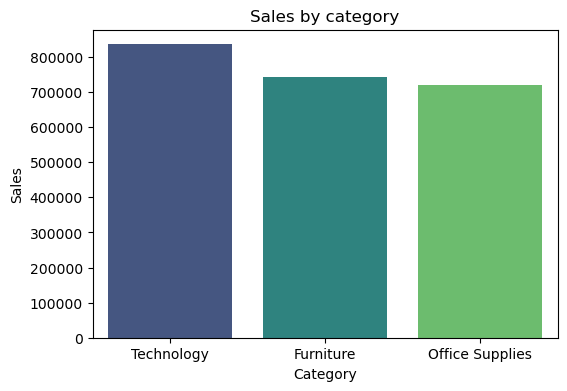

In [20]:
# Which categories contribute most to sales?

Category_sales=df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(6,4))    
sns.barplot(data=Category_sales,x='Category',y='Sales', palette='viridis')
plt.title('Sales by category')


The Technology category has the highest sales, followed by Furniture and Office Supplies. 
This suggests that tech products are in high demand.

Text(0.5, 1.0, 'Sales by Region')

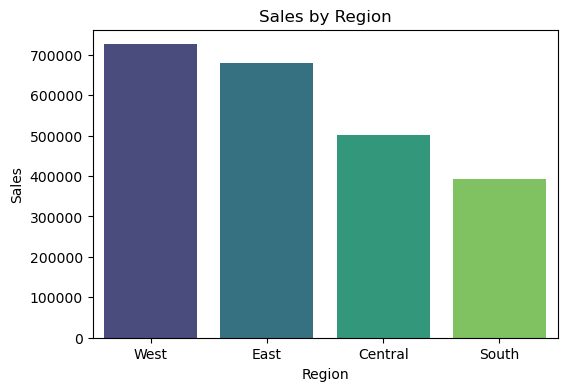

In [21]:
# Which Region contribute most to sales?
 
Region_sales=df.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(6,4))    
sns.barplot(data=Region_sales,x='Region',y='Sales',palette='viridis')
plt.title('Sales by Region')


Regions, like West and East, have higher sales compared to others. 
This suggests stronger demand in these areas, 
possibly due to higher purchasing power or better marketing reach.

Text(0.5, 1.0, 'Sales by Ship mode')

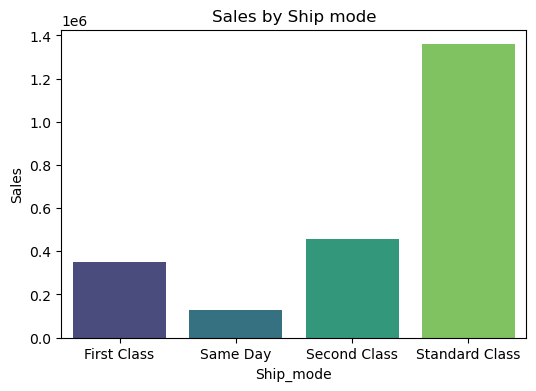

In [22]:
#How does shipping method impact sales 

ship_mode_analysis = df.groupby('Ship_mode')['Sales'].sum().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=ship_mode_analysis,x='Ship_mode',y='Sales', palette='viridis')
plt.title('Sales by Ship mode')


Standard Class is the most used shipping mode,
while Same-Day Shipping is the least used, likely due to higher costs.

Text(0.5, 1.0, 'Sales by Customer Segment')

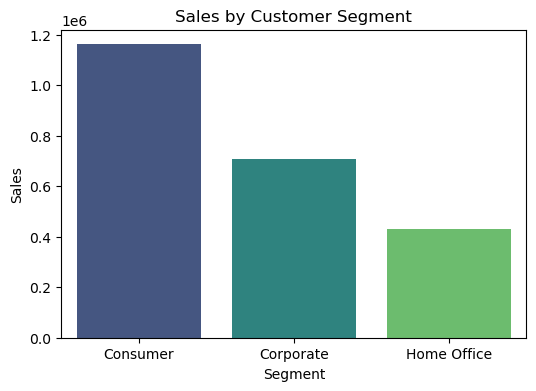

In [23]:
#Compare how different customer segments  are performing in terms of sales 

segment_analysis = df.groupby('Segment')['Sales'].sum().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=segment_analysis,x='Segment',y='Sales', palette='viridis')
plt.title('Sales by Customer Segment')


The Consumer segment accounts for the highest sales, indicating strong demand from individual buyers compared to Corporate and Home Office segments.



Text(0.5, 1.0, 'Sales by State')

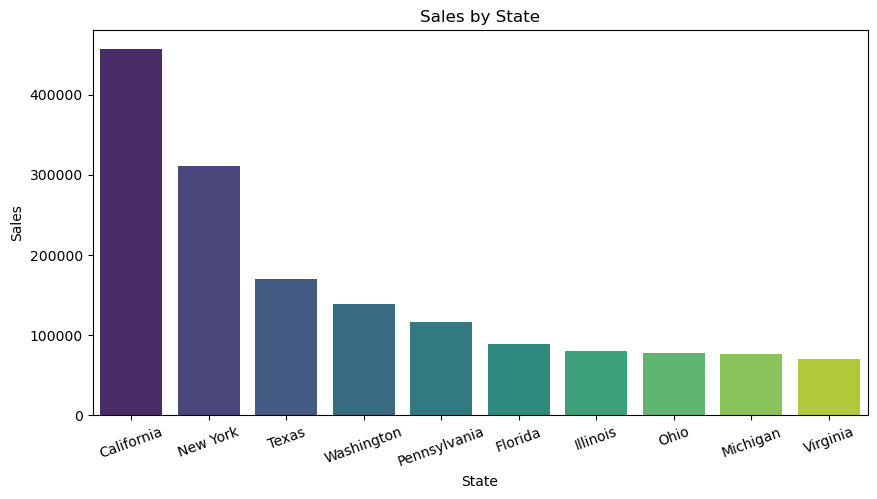

In [24]:
#What are the top selling state

state_analysis = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=state_analysis,x='State',y='Sales', palette='viridis')
plt.xticks(rotation=20)
plt.title('Sales by State')


California generates the highest sales, followed by New York and Texas, highlighting key markets.


Text(0.5, 1.0, 'Shipping Mode Preference')

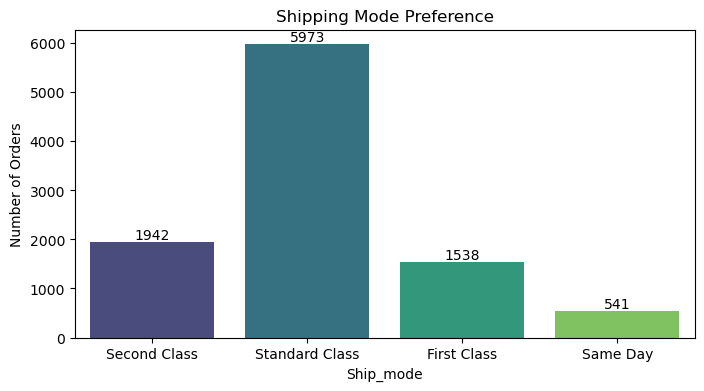

In [25]:
#What shipping mode do customers prefer?

plt.figure(figsize=(8,4))
ax=sns.countplot(x=df['Ship_mode'], palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.ylabel('Number of Orders')
plt.title('Shipping Mode Preference')


Standard Class is the most frequently chosen shipping mode as compare to others

Text(0.5, 1.0, 'Top 10 Customers by Sales')

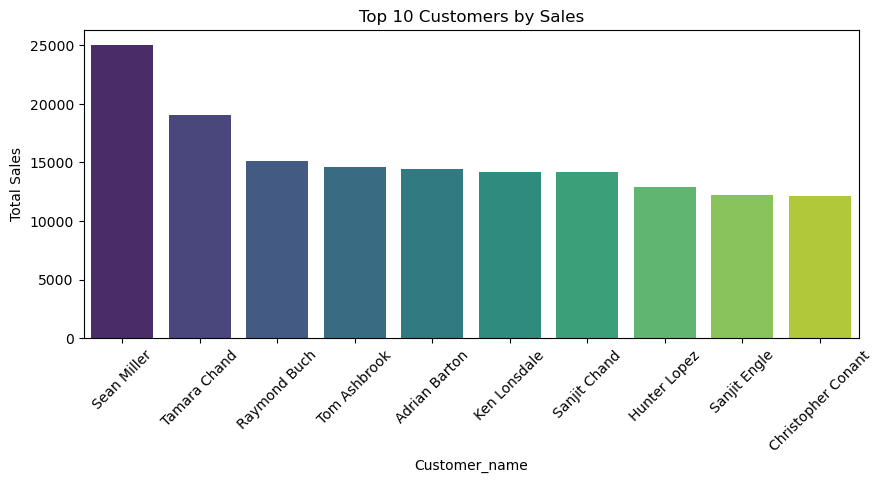

In [26]:
#Identify top customers by sales.

customer_sales = df.groupby('Customer_name')[['Sales']].sum().sort_values(by='Sales',ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=customer_sales.index, y=customer_sales['Sales'], palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.title('Top 10 Customers by Sales')


The Sean Miller customer accounts for the highest sales as compare to others

Text(0.5, 1.0, 'Relation Between Discount and Profit')

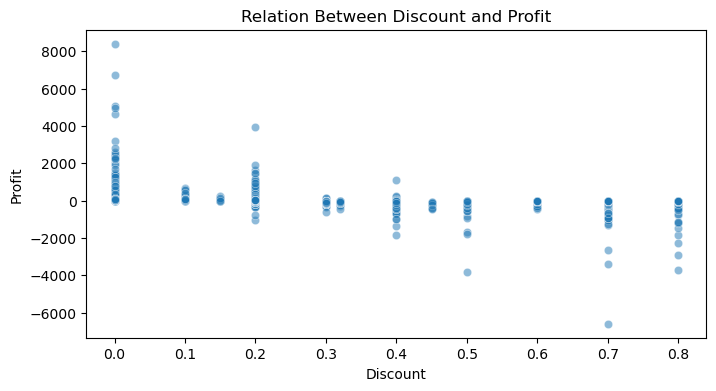

In [27]:
#Show the relation between the discount and profit

plt.figure(figsize=(8,4))
sns.scatterplot(x=df['Discount'], y=df['Profit'], alpha=0.5)
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Relation Between Discount and Profit')


There’s an inverse relationship between discount and profit higher discounts often lead to lower profits
  

Text(0.5, 1.0, 'Top 10 Most Profitable Sub-Categories')

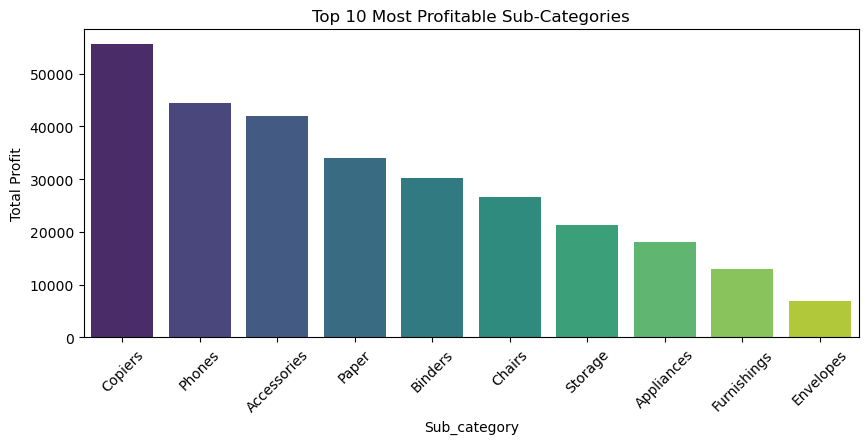

In [28]:
# Which subcategory is most profitable

subcat_profit = df.groupby('Sub_category')['Profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=subcat_profit.index, y=subcat_profit.values, palette='viridis')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.title('Top 10 Most Profitable Sub-Categories')


Copiers and Phones are the most profitable sub-categories, indicating high-margin products.

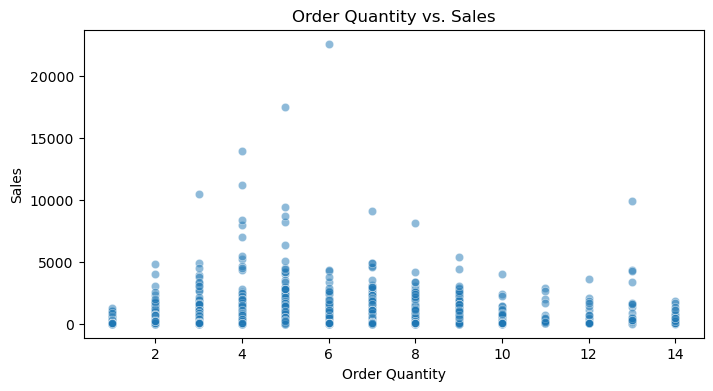

In [29]:
# Show relation between order quantity and sales

plt.figure(figsize=(8,4))
sns.scatterplot(x=df['Quantity'], y=df['Sales'], alpha=0.5)
plt.xlabel('Order Quantity')
plt.ylabel('Sales')
plt.title('Order Quantity vs. Sales')
plt.show()


The relationship between order quantity and sales like When customers order more items, the total sales amount goes up. 
This shows that big orders help increase revenue.

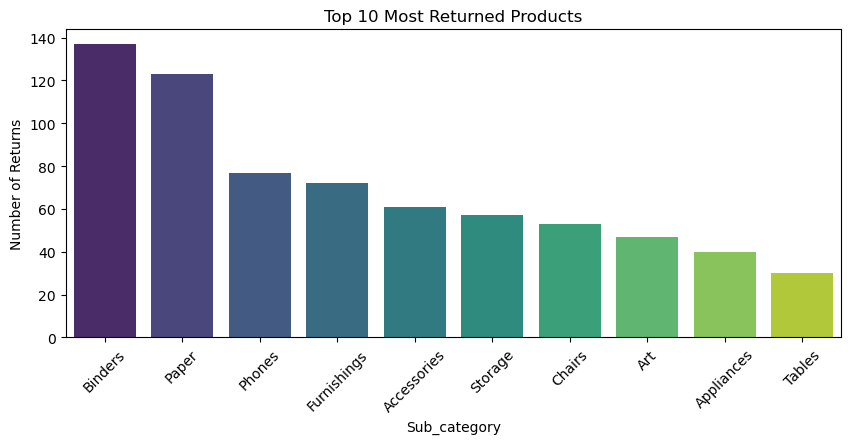

In [30]:
#Which products are returned the most?

returns = df[df['Returned'] == 'Yes'].groupby('Sub_category')['Returned'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=returns.index, y=returns.values, palette='viridis')
plt.ylabel('Number of Returns')
plt.xticks(rotation=45)
plt.title('Top 10 Most Returned Products')
plt.show()


Binders and Phones have the highest return rates,
possibly may be due to quality or functionality issues.

In [31]:
# Calculate profit loss due to returns
profit_loss_due_to_returns = df[df['Returned'] == 'Yes']['Profit'].sum()
print("Total Profit Loss Due to Returns:", profit_loss_due_to_returns)

Total Profit Loss Due to Returns: 23232.3615


Text(0, 0.5, 'Average Delivery Time (Days)')

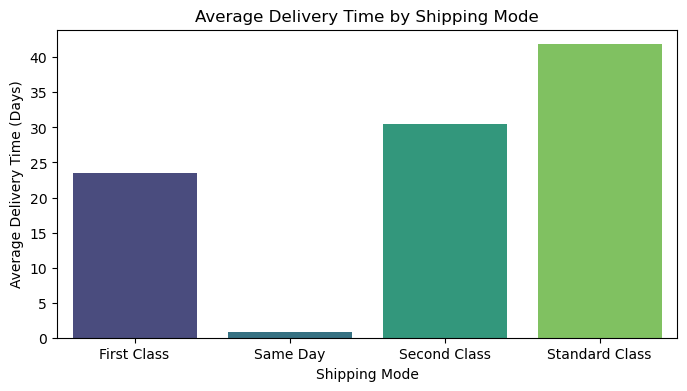

In [32]:
#Delivery Time Analysis
#Find the average delivery time per shipping mode 

delivery_time_shipping = df.groupby('Ship_mode')['Delivery_time'].mean().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(x='Ship_mode', y='Delivery_time', data=delivery_time_shipping, palette='viridis')
plt.title('Average Delivery Time by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Delivery Time (Days)')


Standard Class may have the longest delivery time, while Same-Day should have the shortest.
If any shipping mode is taking longer than expected, it might indicate logistics issues.



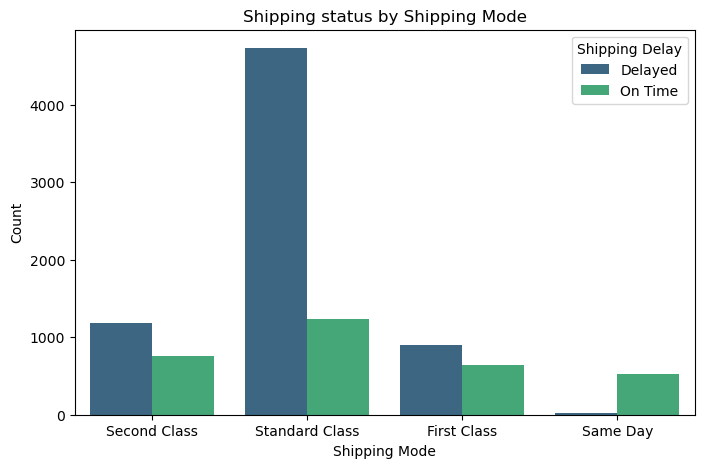

In [34]:
# Shipping Delay analysis
#shows how delays vary across different shipping modes.

plt.figure(figsize=(8,5))
sns.countplot(x='Ship_mode', hue='Shipping_status', data=df, palette='viridis')
plt.title('Shipping status by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.legend(title='Shipping Delay')


The Standard Class shipping has the most delays, likely because many people use it, which can slow down deliveries

# Saving the clean file

In [35]:
# Save cleaned data as csv 
df.to_csv("Retail_sales.csv", index=False)

In [36]:
df.columns

Index(['Row_id', 'Order_id', 'Order_date', 'Ship_date', 'Ship_mode',
       'Customer_id', 'Customer_name', 'Segment', 'Country', 'City', 'State',
       'Postal_code', 'Region', 'Retail_sales_people', 'Product_id',
       'Category', 'Sub_category', 'Product_name', 'Returned', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Delivery_time', 'Shipping_status',
       'Revenue'],
      dtype='object')

# Connecting to SQL server

In [42]:
import pyodbc

In [43]:
conn = pyodbc.connect(
    "Driver={ODBC Driver 17 for SQL Server};"
    "Server=DESKTOP-1MFUOVR\\SQLEXPRESS;"
    "Database=demo;"
    "Trusted_Connection=yes;"
)
cursor = conn.cursor()

# Creating table

In [44]:
# Create Table in SQL Server
cursor.execute("""
CREATE TABLE Retail_Sales (
    Row_id INT PRIMARY KEY,
    Order_id VARCHAR(50),
    Order_date DATE,
    Ship_date DATE,
    Ship_mode VARCHAR(50),
    Customer_id VARCHAR(50),
    Customer_name VARCHAR(100),
    Segment VARCHAR(50),
    Country VARCHAR(50),
    City VARCHAR(50),
    State VARCHAR(50),
    Postal_code INT,
    Region VARCHAR(50),
    Retail_sales_people VARCHAR(100),
    Product_id VARCHAR(50),
    Category VARCHAR(50),
    Sub_category VARCHAR(50),
    Product_name VARCHAR(200),
    Returned VARCHAR(10),
    Sales FLOAT,
    Quantity INT,
    Discount FLOAT,
    Profit FLOAT,
    Delivery_time INT,
    Shipping_status VARCHAR(100),
    Revenue FLOAT
   
);

""")

conn.commit()


# Insert Clean Data into SQL Server

In [45]:
df = pd.read_csv("Retail_sales.csv") 

In [48]:
# Insert data

for index, row in df.iterrows():
    cursor.execute("""
        INSERT INTO Retail_Sales (
            Row_id, Order_id, Order_date, Ship_date, Ship_mode, Customer_id, Customer_name, 
            Segment, Country, City, State, Postal_code, Region, Retail_sales_people, 
            Product_id, Category, Sub_category, Product_name, Returned, Sales, 
            Quantity, Discount, Profit, Delivery_time, Shipping_status,
            Revenue
        ) 
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """, 
        row["Row_id"], row["Order_id"], row["Order_date"], row["Ship_date"], row["Ship_mode"], row["Customer_id"], row["Customer_name"], 
        row["Segment"], row["Country"], row["City"], row["State"], row["Postal_code"], row["Region"], row["Retail_sales_people"], 
        row["Product_id"], row["Category"], row["Sub_category"], row["Product_name"], row["Returned"], row["Sales"], 
        row["Quantity"], row["Discount"], row["Profit"],  row["Delivery_time"], 
        row["Shipping_status"], row["Revenue"]
    )

# Commit and close connection
conn.commit()
cursor.close()
conn.close()

print("Data inserted successfully!")

Data inserted successfully!
